# GUIDELINES FOR TASK 1
### 1. Website Selection:
- Choose a website with publicly accessible data. This could be a news website, an e-
commerce site, or any other site of interest.
### 2. Web Scraping:
- Write a Python script using libraries like Beautiful Soup and Requests to scrape data
from the chosen website.
- Specify the data to be scraped, such as headlines, product details, or any other
relevant information.
### 3. Data Processing:
- Process the scraped data, which may involve cleaning, organizing, or extracting specific
information.
dependencies.
### 4. Automation:
- Incorporate automation by scheduling the script to run at specific intervals (e.g., daily or
weekly) to keep the dataset up-to-date.
5. Documentation:
- Create a document that explains the purpose of the script, how to run it, and any

### We will use Jumia.sn website for webscraping
Notice that i use this website only in the purpose of my internship only

Jumia, Senegal's #1 e-commerce platform, established in May 2012 with the aim of becoming Africa's
the first online marketplace, offering the widest range of products and implementing top-notch online
and offline practices, including nationwide delivery and the pioneering of Senegal's 
first e-commerce academy to empower young entrepreneurs.

In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Specify the URL of the website
url = "https://www.jumia.sn/"
# Send a GET request to the URL
response = requests.get(url)
# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Extract data based on HTML structure
products = soup.find_all('article', class_='prd _box _hvr')

# Initialize lists to store data
product_name = []
products_price = []
discount = []

# Extract product details
for product in products:
    # Extract product name
    name_element = product.find('div', class_='name')
    product_name.append(name_element.text.strip() if name_element else '')

    # Extract product price
    price_element = product.find('div', class_='prc')
    products_price.append(price_element.text.strip() if price_element else '')

    # Extract discount
    discount_element = product.find('div', class_='bdg _dsct')
    discount.append(discount_element.text.strip() if discount_element else '')

# Create a DataFrame
df = pd.DataFrame({
    "Product name": product_name,
    "Product price": products_price,
    "Discount": discount
})

# Print and save the DataFrame to a CSV file
print(df)
df.to_csv("jumia_ci.csv", index=False, encoding='utf-8')



                                          Product name Product price Discount
0    WETIKE Baskets décontractées à coussin d'air p...    6 790 FCFA      60%
1    La Rive Eau de Parfum Pour Femme La Rive IN Wo...    2 000 FCFA         
2    SMART TECHNOLOGY TV LED 55" - UHD SMART TV AND...  199 000 FCFA      20%
3    Geneva Ensemble Montre Homme + Bracelet  à Qua...    5 500 FCFA      73%
4    Generic Lampe Led romantique 3D en forme de cœ...    3 900 FCFA      22%
..                                                 ...           ...      ...
125  SMART TECHNOLOGY LOT DE 2 Ventilateurs Mural 1...   20 400 FCFA      42%
126  SMART TECHNOLOGY Régulateur De Tension Automat...   12 200 FCFA      59%
127  Égouttoir à Vaisselle - 2 Niveaux - Avec Bac A...    4 900 FCFA      67%
128                   Generic Un Gant de cuisine 11115    1 000 FCFA         
129  Service de couverts 16 pièces en acier inoxyda...    2 200 FCFA      56%

[130 rows x 3 columns]


In [64]:
df

,Product name,Product price,Discount
0,WETIKE Baskets décontractées à coussin d'air p...,6 790 FCFA,60%
1,La Rive Eau de Parfum Pour Femme La Rive IN Wo...,2 000 FCFA,
2,"SMART TECHNOLOGY TV LED 55"" - UHD SMART TV AND...",199 000 FCFA,20%
3,Geneva Ensemble Montre Homme + Bracelet à Qua...,5 500 FCFA,73%
4,Generic Lampe Led romantique 3D en forme de cœ...,3 900 FCFA,22%
...,...,...,...
125,SMART TECHNOLOGY LOT DE 2 Ventilateurs Mural 1...,20 400 FCFA,42%
126,SMART TECHNOLOGY Régulateur De Tension Automat...,12 200 FCFA,59%
127,Égouttoir à Vaisselle - 2 Niveaux - Avec Bac A...,4 900 FCFA,67%
128,Generic Un Gant de cuisine 11115,1 000 FCFA,


In [65]:
df.dtypes

Product name     object
Product price    object
Discount         object
dtype: object

## Data Cleaning

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product name   130 non-null    object
 1   Product price  130 non-null    object
 2   Discount       130 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


In [57]:
# checking if there is any null data or not
df.isnull().sum()

Product name     0
Product price    0
Discount         0
dtype: int64

In [58]:
# checking if there is any NaN values
df.isna().sum()

Product name     0
Product price    0
Discount         0
dtype: int64

In [66]:
# Replace empty strings with NaN
df['Discount'] = df['Discount'].replace('', np.nan)
# Convert percentage string to float
df['Discount'] = df['Discount'].str.rstrip('%').astype(float) / 100
# Convert the "Product price" column to string type
df["Product price"] = df["Product price"].astype(str)

# Remove " FCFA" from "Product price" column, convert spaces to thousand separators
df["Product price"] = df["Product price"].str.replace(" FCFA", "").str.replace(" ", "")

# Convert to float
df["Product price"] = pd.to_numeric(df["Product price"], errors='coerce')

# Delete rows with errors of conversion
df = df.dropna()
print(df)

                                          Product name  Product price  \
0    WETIKE Baskets décontractées à coussin d'air p...         6790.0   
2    SMART TECHNOLOGY TV LED 55" - UHD SMART TV AND...       199000.0   
3    Geneva Ensemble Montre Homme + Bracelet  à Qua...         5500.0   
4    Generic Lampe Led romantique 3D en forme de cœ...         3900.0   
5    DECAKILA Machine Air Fryer - friteuse à air de...        22400.0   
..                                                 ...            ...   
124  Service de couverts 16 pièces en acier inoxyda...         2200.0   
125  SMART TECHNOLOGY LOT DE 2 Ventilateurs Mural 1...        20400.0   
126  SMART TECHNOLOGY Régulateur De Tension Automat...        12200.0   
127  Égouttoir à Vaisselle - 2 Niveaux - Avec Bac A...         4900.0   
129  Service de couverts 16 pièces en acier inoxyda...         2200.0   

     Discount  
0        0.60  
2        0.20  
3        0.73  
4        0.22  
5        0.36  
..        ...  
124      0.

In [67]:
df.dtypes

Product name      object
Product price    float64
Discount         float64
dtype: object

#### Our dataframe is now clean and conversions are made
#### Now we can process basics operations

## DataViz

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

#### What is the distribution of product prices? in Jumia SN Ecommerce Website

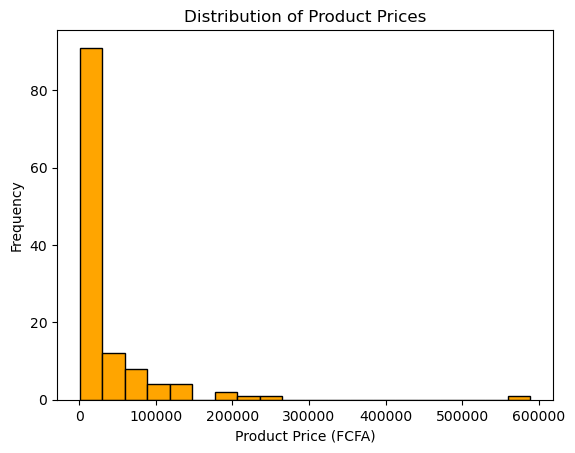

In [80]:
# Assuming df is your DataFrame containing the data
plt.hist(df['Product price'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price (FCFA)')
plt.ylabel('Frequency')
plt.show()

#### How much discount is typically offered on products?

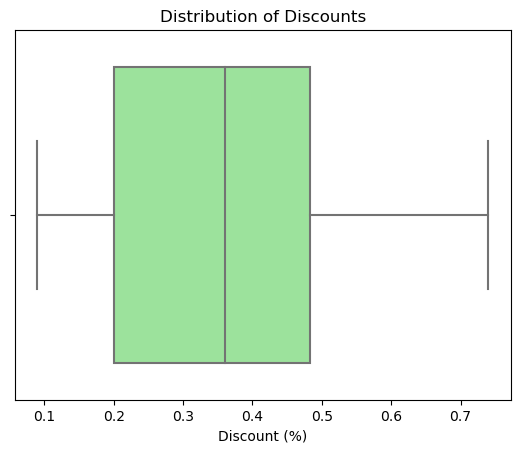

In [76]:
sns.boxplot(x=df['Discount'], color='lightgreen')
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.show()

#### Which products have the highest discounts?

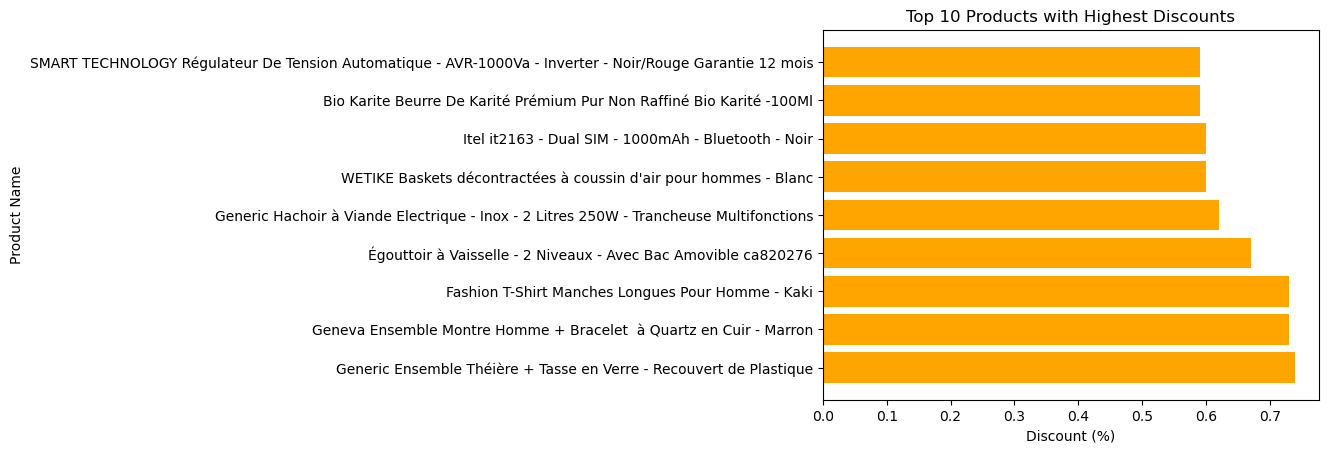

In [78]:
top_discounts = df.nlargest(10, 'Discount')
plt.barh(top_discounts['Product name'], top_discounts['Discount'], color='orange')
plt.xlabel('Discount (%)')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Highest Discounts')
plt.show()


#### Is there a relationship(correlation) between product price and discount?

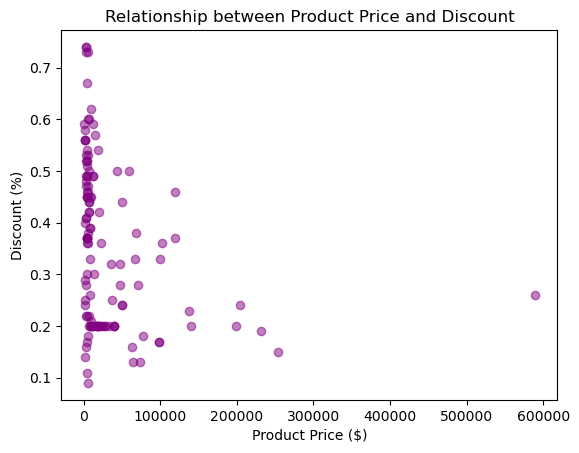

In [79]:
# Assuming df is your DataFrame containing the data
plt.scatter(df['Product price'], df['Discount'], color='purple', alpha=0.5)
plt.title('Relationship between Product Price and Discount')
plt.xlabel('Product Price ($)')
plt.ylabel('Discount (%)')
plt.show()

#### What are the top 10 products by sales revenue?

In [83]:
top_products = df.assign(Sales_revenue=df['Product price'] * (1 - df['Discount'])).nlargest(10, 'Sales_revenue')
print(top_products[['Product name', 'Sales_revenue']])


                                          Product name  Sales_revenue
96   Samsung Smart TV LED 65 Pouces - Ultra HD - No...       435860.0
98   Elactron Televiseur ELACTRON 55 Pouces OLED Sm...       215900.0
95   Astech Smart TV LED 55 Pouces Android 55AC111D...       187596.0
2    SMART TECHNOLOGY TV LED 55" - UHD SMART TV AND...       159200.0
99   Astech Smart TV 50 Pouces Android - 50AC111D -...       155116.0
21          Astech Split AST-09GB41M - 9000 BTU 1.25CV       111920.0
112  Astech Congélateur Horizontal 280 Litres - CH2...       106183.0
9    Nexon Réfrigérateur 140 Litres – 2 Portes – NF...        82087.0
23   Nexon Réfrigérateur 140 Litres – 2 Portes – NF...        82087.0
97   SMART TECHNOLOGY SMART - Ecran 43 Pouces - FHD...        74837.7


#### Which product has the highest price?

In [86]:
max_price_product = df.loc[df['Product price'].idxmax()]
print(f"The product with the highest price is: {max_price_product['Product name']} priced at {max_price_product['Product price']}FCFA")


The product with the highest price is: Samsung Smart TV LED 65 Pouces - Ultra HD - Noir - Garantie 12 Mois priced at 589000.0FCFA


#### What is the average discount percentage across all products?

In [87]:
average_discount = df['Discount'].mean()
print(f"Average discount percentage: {average_discount:.2f}%")


Average discount percentage: 0.36%
